# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
from statsmodels.graphics.regressionplots import influence_plot

/Users/aloksingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data.shape



(1436, 38)

In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis = 1,inplace = True)

In [7]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [10]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [11]:
data.duplicated().sum()

1

In [12]:
data.drop_duplicates(inplace = True)

<Axes: >

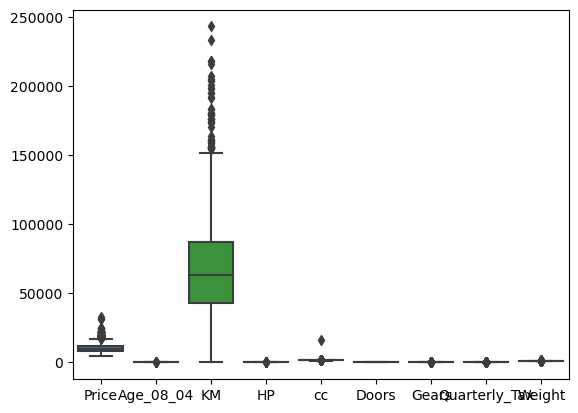

In [13]:
sns.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5441f6fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe544206520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5441f6d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe544206a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe544206d30>],
 'means': []}

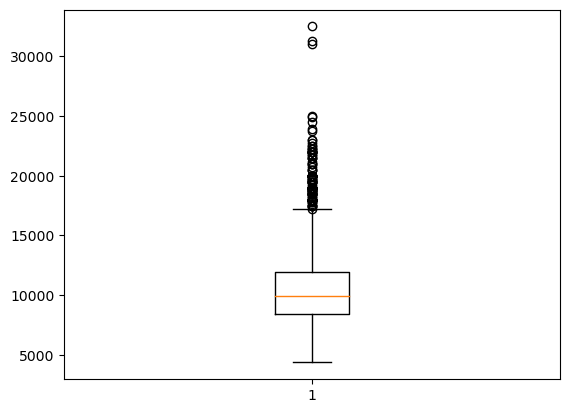

In [14]:
box = plt.boxplot(data['Price'])
box

In [15]:
data[data['Price']>=30000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480


In [16]:
data.drop([109,110,111],axis=0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5443188e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe544318e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe544318640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5443263a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe544326640>],
 'means': []}

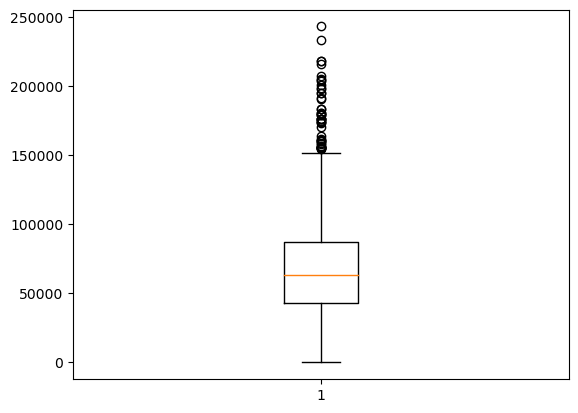

In [17]:
box1 = plt.boxplot(data['KM'])
box1

In [18]:
data[data['KM']>=230000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
186,6950,43,243000,69,1900,3,5,185,1110
1044,5900,73,232940,72,2000,5,5,40,1172


In [19]:
data.drop([186,1044],axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5441f6fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe544206520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5441f6d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe544206a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe544206d30>],
 'means': []}

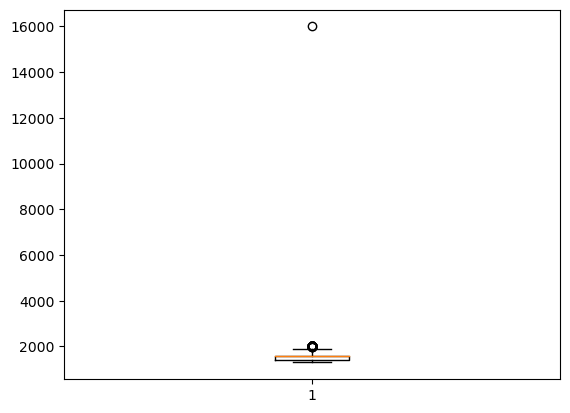

In [20]:
box2 = plt.boxplot(data['cc'])
box

In [21]:
data[data['cc']>=16000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [22]:
data.drop(80, axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5505aa400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5505aa820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5505aa160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5505aad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe544359040>],
 'means': []}

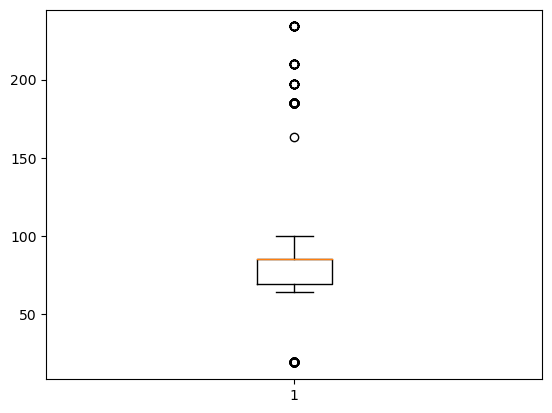

In [23]:
box3 = plt.boxplot(data['Quarterly_Tax'])
box3

In [24]:
data[data['Quarterly_Tax']<50]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
18,16750,24,25563,110,1600,3,5,19,1065
30,12950,29,9750,97,1400,3,5,19,1100
65,16950,26,32181,110,1600,5,5,19,1075
126,15950,20,36000,110,1600,5,5,19,1075
129,15850,13,33477,110,1600,5,5,19,1075
...,...,...,...,...,...,...,...,...,...
1387,7450,78,52287,110,1600,5,5,19,1114
1388,8750,75,52000,110,1600,5,5,19,1075
1416,8950,79,40093,110,1600,5,5,19,1114
1423,7950,80,35821,86,1300,3,5,19,1015


# using IQR for removing outlier 

In [25]:
q1 = data["Quarterly_Tax"].quantile(0.25)
q3 = data["Quarterly_Tax"].quantile(0.75)
iqr = q3-q1

In [26]:
data1= data[data['Quarterly_Tax'].between(q1-1.5*iqr,q3+1.5*iqr)]

In [27]:
data1.shape

(1211, 9)

In [28]:
model = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data1).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1083.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        18:15:48   Log-Likelihood:                -10260.
No. Observations:                1211   AIC:                         2.054e+04
Df Residuals:                    1202   BIC:                         2.058e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.502e+04   1731.589     -8.674      0.000   -1.84e+04   -1.16e+04
Age_08_04      -114.4325      2.694    -42.481      0.000    -119.717    -109.148
KM               -0.0153      0.001    -11.271      0.000      -0.018      -0.013
HP               54.7931      4.127     13.277      0.000      46.696      62.890
cc               -5.5038      0.415    -13.248      0.000      -6.319      -4.689
Doors           -52.8463     45.031     -1.174      0.241    -141.194      35.501
Gears           504.0115    178.869      2.818      0.005     153.081     854.942
Quarterly_Tax   -12.2989      6.756     -1.820      0.069     -25.554       0.956
Weight           32.4318      1.808     17.939      0.000      28.885      35.979
==============================================================================
Omnibus:                      111.689   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.626
Skew:                           0.007   Prob(JB):                    3.30e-157
Kurtosis:                       6.779   Cond. No.                     3.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# doors p value is greater than 0.005 so we plot cook distance for chacking which point is more influence 
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c


array([4.42782336e-04, 1.23577664e-02, 4.25316173e-02, ...,
       3.88933229e-03, 4.86814495e-06, 1.39524042e-03])

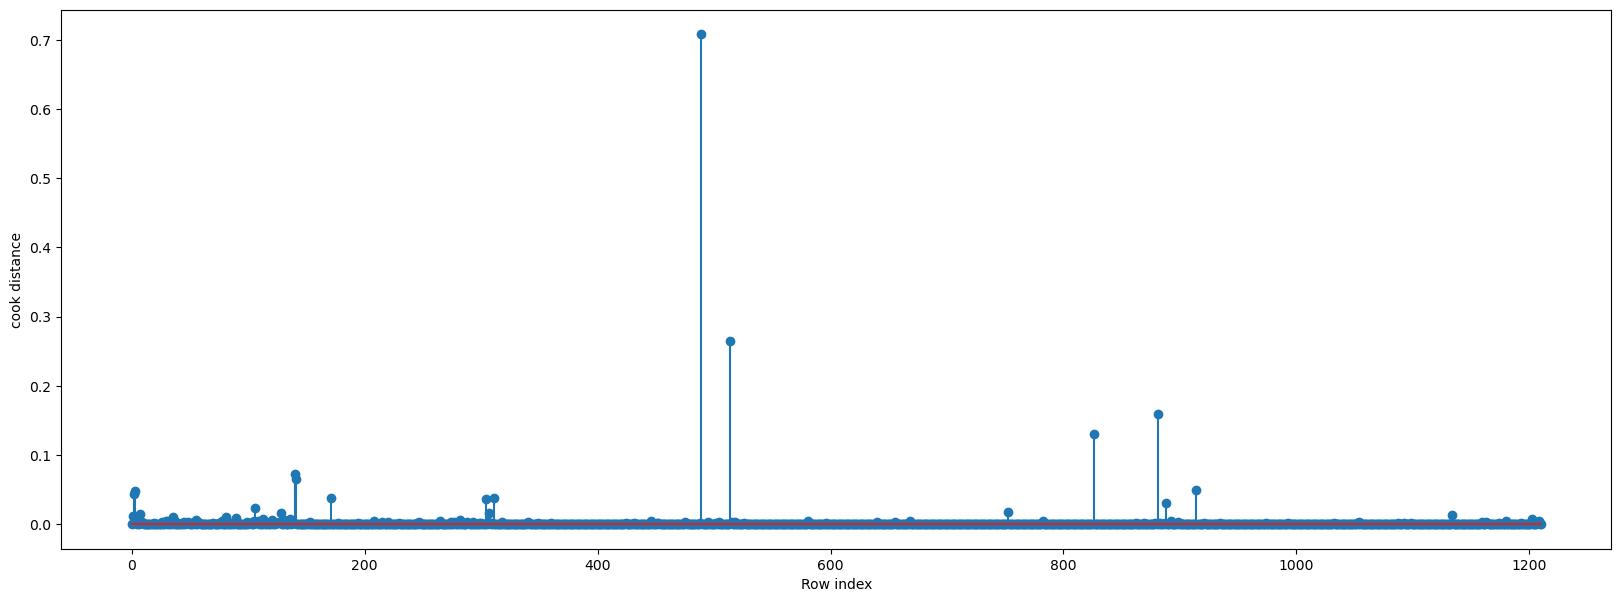

In [31]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("cook distance")
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(489, 0.7084178336647321)

In [33]:
data.drop(489,axis=0,inplace = True)

In [34]:
model1 = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data1).fit()

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1083.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        18:15:48   Log-Likelihood:                -10260.
No. Observations:                1211   AIC:                         2.054e+04
Df Residuals:                    1202   BIC:                         2.058e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.502e+04   1731.589     -8.674      0.000   -1.84e+04   -1.16e+04
Age_08_04      -114.4325      2.694    -42.481      0.000    -119.717    -109.148
KM               -0.0153      0.001    -11.271      0.000      -0.018      -0.013
HP               54.7931      4.127     13.277      0.000      46.696      62.890
cc               -5.5038      0.415    -13.248      0.000      -6.319      -4.689
Doors           -52.8463     45.031     -1.174      0.241    -141.194      35.501
Gears           504.0115    178.869      2.818      0.005     153.081     854.942
Quarterly_Tax   -12.2989      6.756     -1.820      0.069     -25.554       0.956
Weight           32.4318      1.808     17.939      0.000      28.885      35.979
==============================================================================
Omnibus:                      111.689   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.626
Skew:                           0.007   Prob(JB):                    3.30e-157
Kurtosis:                       6.779   Cond. No.                     3.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model1_influence = model1.get_influence()
(c1,_) = model1_influence.cooks_distance
c1

array([4.42782336e-04, 1.23577664e-02, 4.25316173e-02, ...,
       3.88933229e-03, 4.86814495e-06, 1.39524042e-03])

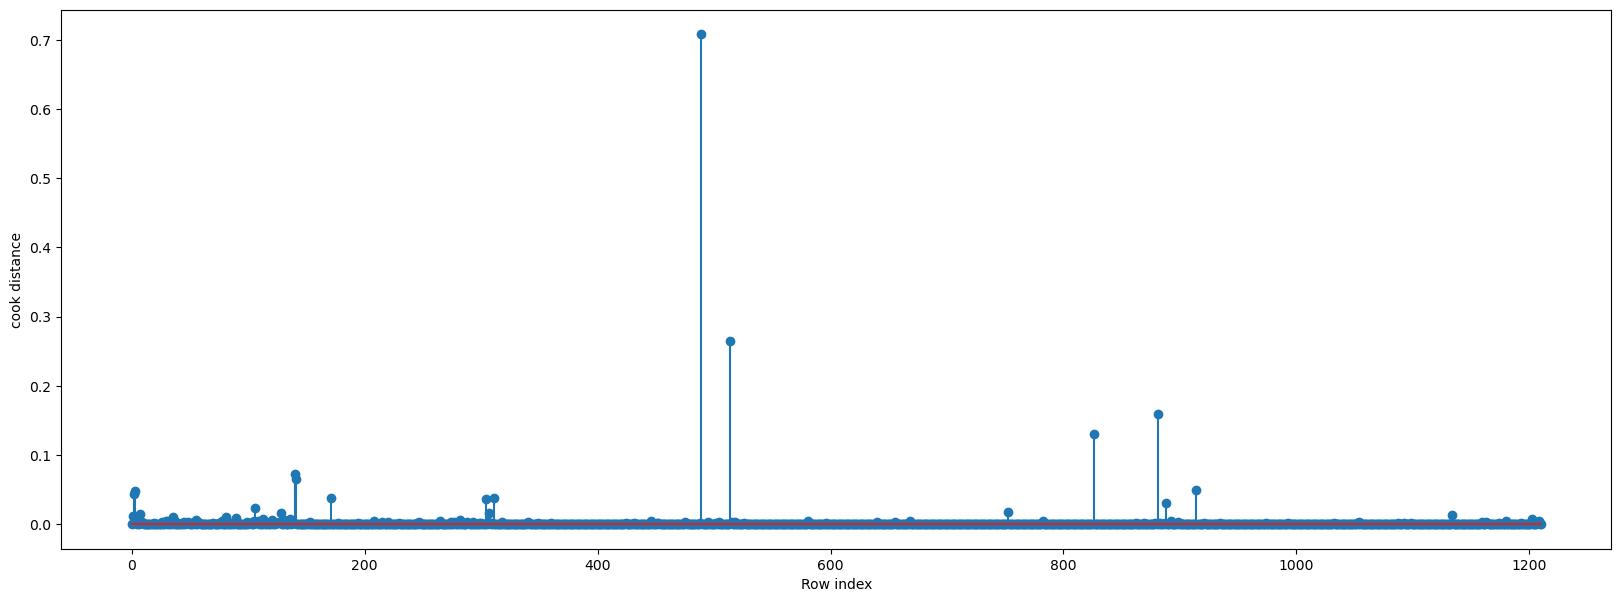

In [41]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data1)),np.round(c1,3))
plt.xlabel("Row index")
plt.ylabel("cook distance")
plt.show()

In [43]:
(np.argmax(c1),np.max(c1))

(489, 0.7084178336647321)

In [47]:
model2 = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data1).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1083.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        18:17:50   Log-Likelihood:                -10260.
No. Observations:                1211   AIC:                         2.054e+04
Df Residuals:                    1202   BIC:                         2.058e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.502e+04   1731.589     -8.674      0.000   -1.84e+04   -1.16e+04
Age_08_04      -114.4325      2.694    -42.481      0.000    -119.717    -109.148
KM               -0.0153      0.001    -11.271      0.000      -0.018      -0.013
HP               54.7931      4.127     13.277      0.000      46.696      62.890
cc               -5.5038      0.415    -13.248      0.000      -6.319      -4.689
Doors           -52.8463     45.031     -1.174      0.241    -141.194      35.501
Gears           504.0115    178.869      2.818      0.005     153.081     854.942
Quarterly_Tax   -12.2989      6.756     -1.820      0.069     -25.554       0.956
Weight           32.4318      1.808     17.939      0.000      28.885      35.979
==============================================================================
Omnibus:                      111.689   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.626
Skew:                           0.007   Prob(JB):                    3.30e-157
Kurtosis:                       6.779   Cond. No.                     3.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
data.drop("Doors",axis = 1,inplace = True)

In [50]:
model3 = sn.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data = data).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1264.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        18:17:58   Log-Likelihood:                -12257.
No. Observations:                1428   AIC:                         2.453e+04
Df Residuals:                    1420   BIC:                         2.457e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4213.9984   1409.070     -2.991      0.003   -6978.081   -1449.916
Age_08_04      -122.7517      2.563    -47.891      0.000    -127.780    -117.724
KM               -0.0172      0.001    -13.375      0.000      -0.020      -0.015
HP               37.9867      2.883     13.174      0.000      32.331      43.643
cc               -2.1202      0.310     -6.844      0.000      -2.728      -1.513
Gears           570.1110    186.940      3.050      0.002     203.403     936.819
Quarterly_Tax     7.9430      1.444      5.500      0.000       5.110      10.776
Weight           17.6095      1.132     15.550      0.000      15.388      19.831
==============================================================================
Omnibus:                      171.253   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1355.543
Skew:                          -0.240   Prob(JB):                    4.44e-295
Kurtosis:                       7.749   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""